In [5]:
import numpy as np
import numpy.linalg
import pandas as pd
import sklearn
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics, sklearn.decomposition
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

# Dimensionality Reduction and Matrix Factorization

## Objectives:
1. Apply SVD (complete) and Reduced SVD method to Bars Dataset and evaluate also data with noise.
2. Reconstruct the data with different reduction (2, 5, 10, 16 basis functions).
3. Try the NNMF method similarly.
4. Take the Mnist dataset and apply SVD recomposition and visualize it in vector space. Coloring take from Labels
5. Try to reconstruct the reduced data and visualize it.
6. Use PCA and t-SNE for further visualization of the Mnist dataset


---


 ## Exercise 1: Bars Dataset - SVD Analysis

**Task:** Apply SVD decomposition to the bars dataset.

- Apply complete SVD decomposition to noisy and clean data
- Visualize the singular values and compare clean vs noisy data
- Analyze the differences in singular value patterns


In [6]:
from numpy.linalg import svd

X= pd.read_csv('datasets/ml_05/bars.csv')

print(X.shape)

(9999, 64)


In [7]:
noise = np.random.normal(0,0.1,X.shape)
X_noisy = X + noise

X_noisy = np.clip(X_noisy, 0, 1)

In [8]:
U_clean, S_clean, VT_clean = svd(X, full_matrices=False)
U_noisy, S_noisy, VT_noisy = svd(X_noisy, full_matrices=False)


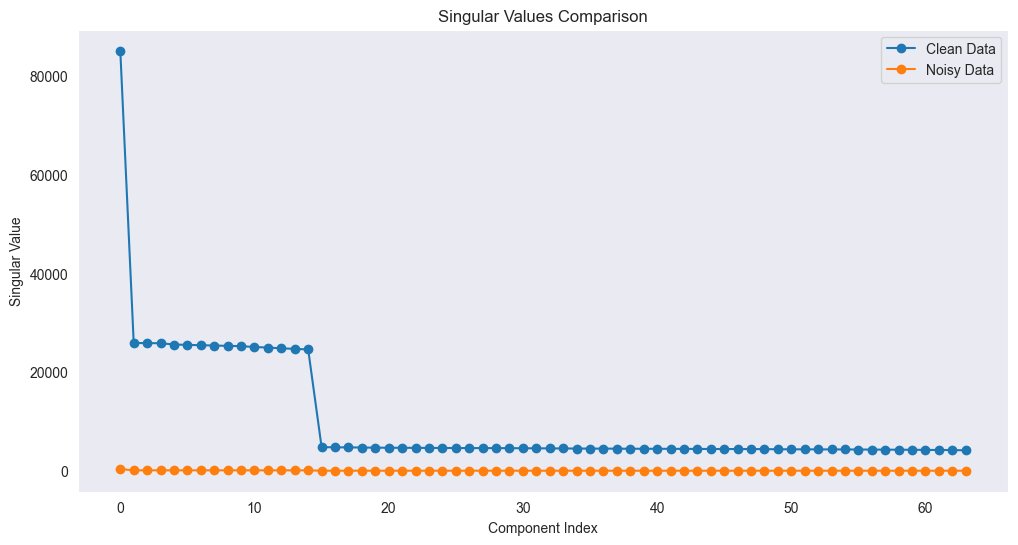

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(S_clean, label='Clean Data', marker='o')
plt.plot(S_noisy, label='Noisy Data', marker='o')
plt.title('Singular Values Comparison')
plt.xlabel('Component Index')
plt.ylabel('Singular Value')
plt.legend()
plt.grid()
plt.show()

## Exercise 2: Data Reconstruction with Different Reduction Levels

**Task:** Reconstruct the Bars Dataset using different numbers of basis functions.

- Test reconstruction with 2, 5, 10, and 16 basis functions
- Calculate reconstruction error (MSE) for each reduction level
- Visualize original vs reconstructed data
- Plot reconstruction error vs number of components



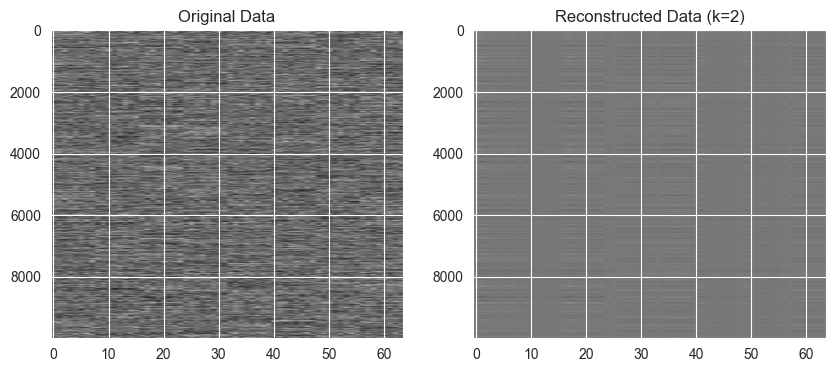

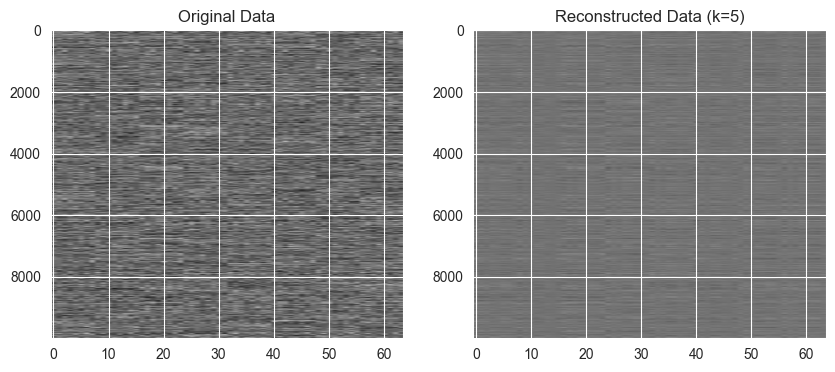

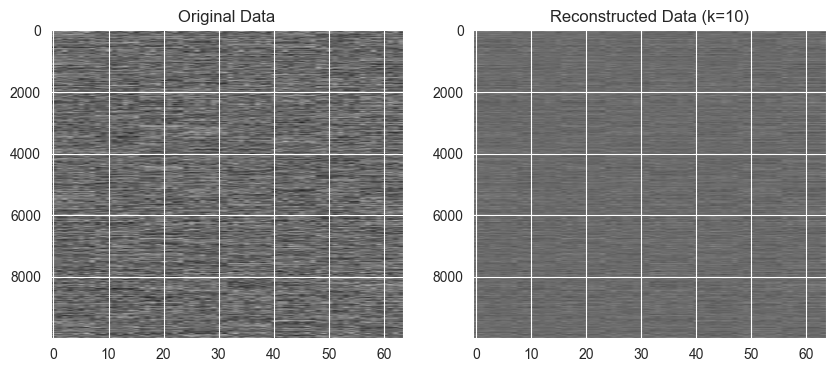

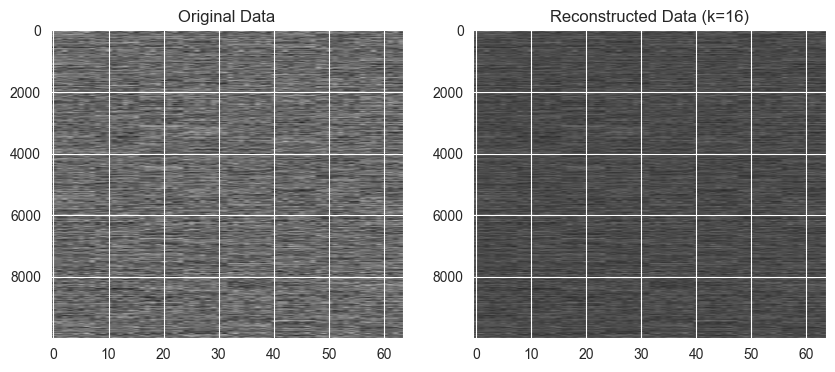

In [10]:
restruction_list = [2, 5, 10, 16]
mse_values = []

for k in restruction_list:
    # Reconstruct using first k components
    U_k = U_clean[:, :k]
    S_k = np.diag(S_clean[:k])
    VT_k = VT_clean[:k, :]
    
    X_reconstructed = U_k @ S_k @ VT_k
    
    # Calculate MSE
    mse = np.mean((X - X_reconstructed) ** 2)
    mse_values.append(mse)
    
    # Visualize original vs reconstructed
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(f'Original Data')
    plt.imshow(X, aspect='auto', cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title(f'Reconstructed Data (k={k})')
    plt.imshow(X_reconstructed, aspect='auto', cmap='gray')
    plt.show()

## Exercise 3: Non-Negative Matrix Factorization (NNMF)

**Task:** Apply NNMF to the Bars Dataset and compare with SVD results.

- Implement NNMF decomposition for the Bars Dataset
- Apply NNMF with different numbers of components (2, 5, 10, 16)
- Compare NNMF reconstruction quality with SVD
- Visualize NNMF components and reconstructions
- Analyze reconstruction errors for both methods


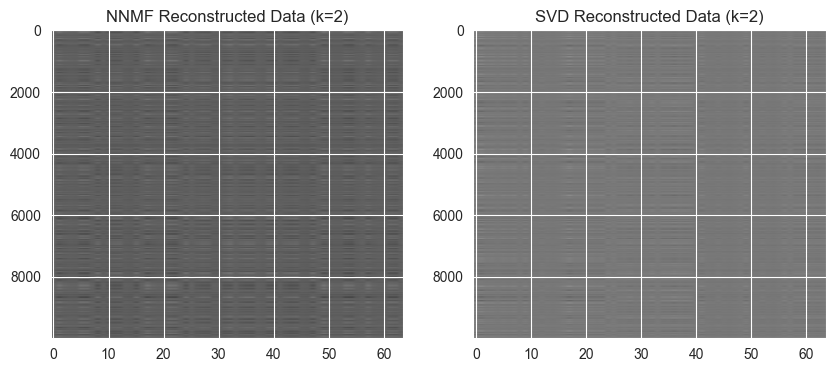

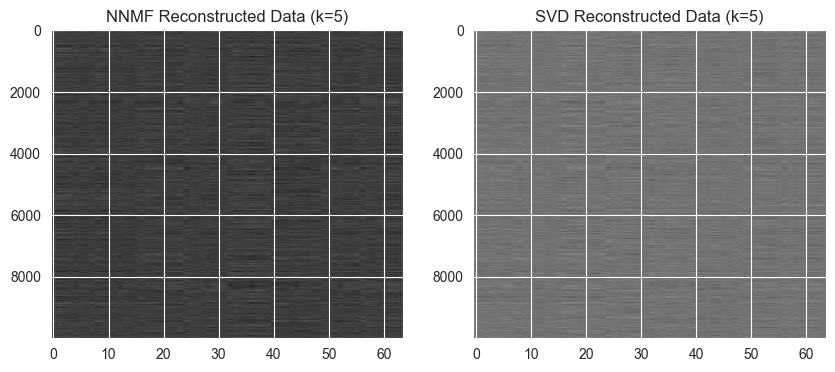

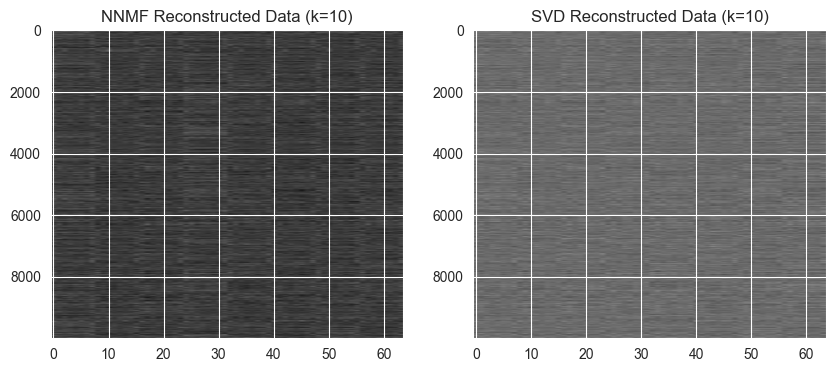

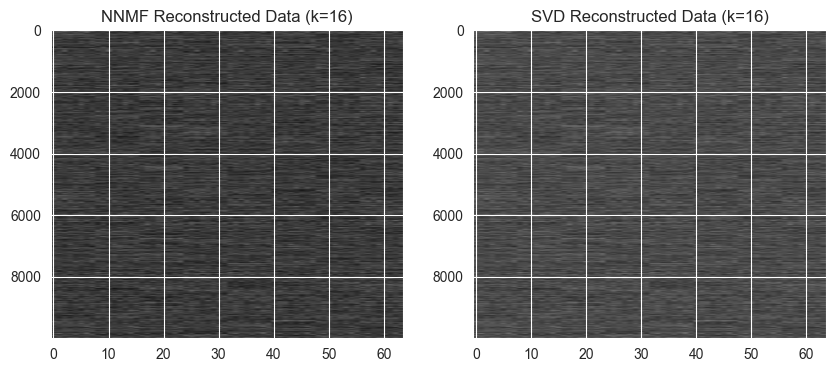

In [11]:

X_non_negative = np.clip(X, 0, None)
components_list = [2, 5, 10, 16]
from sklearn.decomposition import NMF
mse_nnmf_values = []
svd_mse_values = []

for k in components_list:
    model = NMF(n_components=k, init='random', random_state=42, max_iter=1000)
    W = model.fit_transform(X_non_negative)
    H = model.components_
    X_nnmf_reconstructed = W @ H
    mse_nnmf = np.mean((X_non_negative - X_nnmf_reconstructed) ** 2)
    mse_nnmf_values.append(mse_nnmf)
    
    # SVD reconstruction for comparison
    U_k = U_clean[:, :k]
    S_k = np.diag(S_clean[:k])
    VT_k = VT_clean[:k, :]
    X_svd_reconstructed = U_k @ S_k @ VT_k
    mse_svd = np.mean((X - X_svd_reconstructed) ** 2)
    svd_mse_values.append(mse_svd)
    
    # Visualize NNMF reconstruction
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(f'NNMF Reconstructed Data (k={k})')
    plt.imshow(X_nnmf_reconstructed, aspect='auto', cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title(f'SVD Reconstructed Data (k={k})')
    plt.imshow(X_svd_reconstructed, aspect='auto', cmap='gray')
    plt.show()
    


## Exercise 4: MNIST Dataset - SVD Analysis and Visualization

**Task:** Apply SVD decomposition to MNIST dataset and visualize in vector space.

- Apply SVD decomposition to MNIST data
- Analyze singular values and cumulative explained variance
- Visualize MNIST data in 2D using first two SVD components
- Color points by digit labels
- Try different component combinations (e.g., components 2 and 3)


In [12]:
import zipfile
import os
import pandas as pd

zip_path = os.path.join('datasets/ml_05', 'mnist_dataset.zip')

with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open("mnist.csv") as f1, z.open("mnist_labels.csv") as f2:
        X_mnist = pd.read_csv(f1, header=None).values
        Y_mnist = pd.read_csv(f2, header=None).values.flatten()

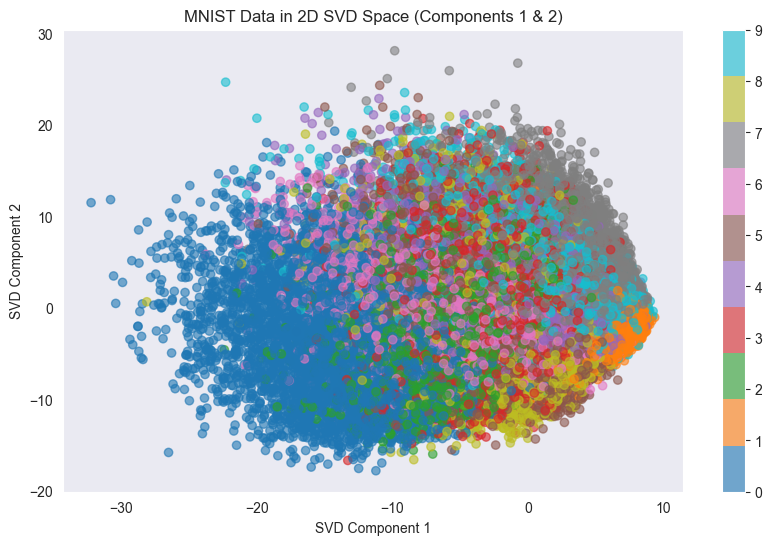

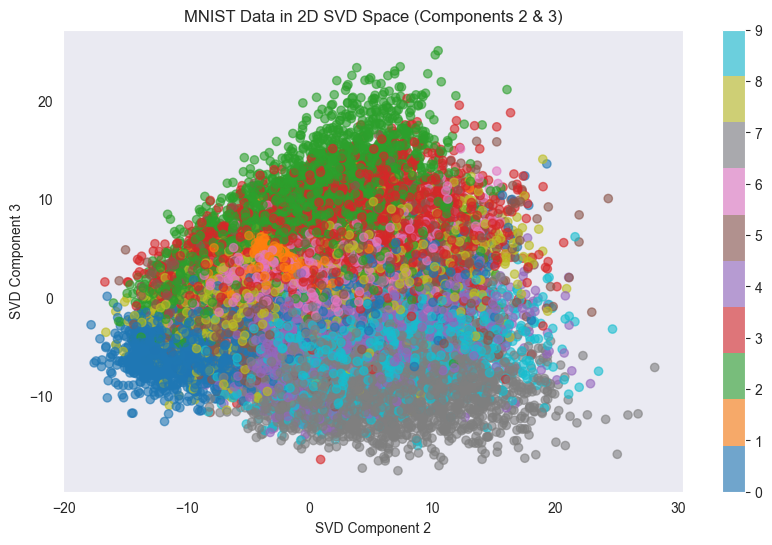

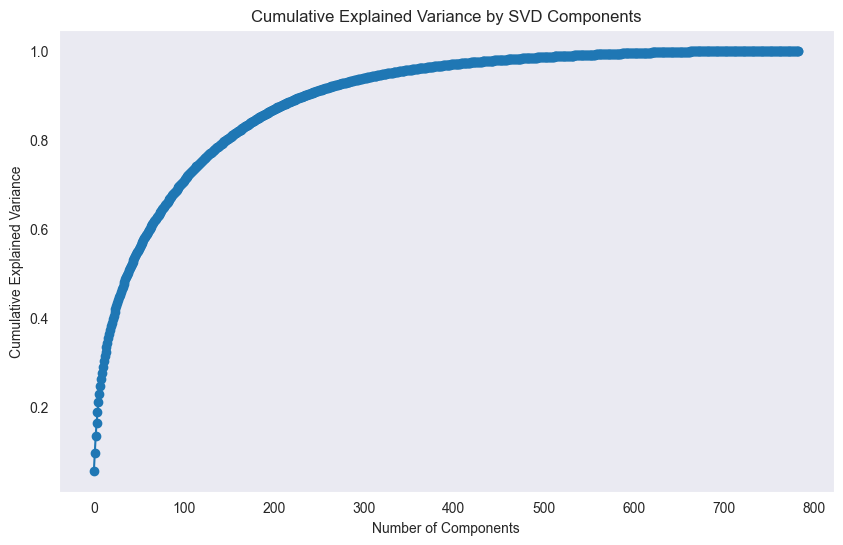

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_mnist_scaled = scaler.fit_transform(X_mnist)
U, S, VT = svd(X_mnist_scaled, full_matrices=False)

# Cumulative explained variance
explained_variance = np.cumsum(S**2) / np.sum(S**2)
cumulative_variance = explained_variance

X_svd_2D = U[:, :2] @ np.diag(S[:2])
X_svd_23D = U[:, 1:3] @ np.diag(S[1:3])

# 2D Visualization
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_svd_2D[:, 0], X_svd_2D[:, 1], c=Y_mnist, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('MNIST Data in 2D SVD Space (Components 1 & 2)')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.grid()
plt.show()
# 2-3D Visualization
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_svd_23D[:, 0], X_svd_23D[:, 1], c=Y_mnist, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('MNIST Data in 2D SVD Space (Components 2 & 3)')
plt.xlabel('SVD Component 2')
plt.ylabel('SVD Component 3')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by SVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

## Exercise 5: PCA and t-SNE Visualization of MNIST Dataset

**Task:** Apply PCA and t-SNE for dimensionality reduction and visualization of MNIST.

- Apply PCA to MNIST dataset
- Visualize MNIST data in 2D PCA space
- Apply t-SNE for non-linear dimensionality reduction
- Compare SVD, PCA, and t-SNE visualizations
- Color all visualizations by digit labels



In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_mnist_scaled)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_mnist_scaled)

# PCA Visualization
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y_mnist, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('MNIST Data in 2D PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()

# t-SNE Visualization
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y_mnist, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('MNIST Data in 2D t-SNE Space')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid()
plt.show()



